In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Load the Data

In [2]:
# Load the mnist dataset
mnist_train = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())

# Create a dataloader
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

# Look at an image

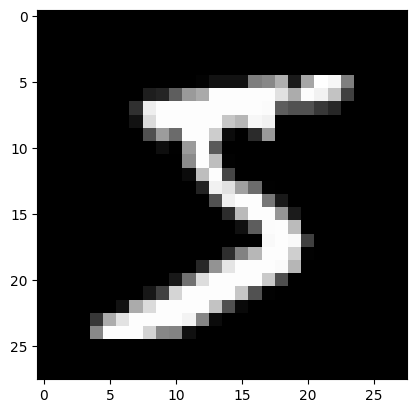

In [3]:
# Load an image of mnist from datasets and show using plt
image, label = mnist_train[0]
plt.imshow(image[0], cmap='gray')

# Build your model:

In [4]:
#define your model here
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = MLP()

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
#train your model here
for epoch in range(10):
    total_loss = 0
    for i, data in enumerate(train_loader):
        train_x, train_y = data
        optimizer.zero_grad()
        output = model(train_x)
        loss = criterion(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(total_loss)

938.0024325251579
395.09133794903755
286.57616034150124
246.57351884245872
225.38663339614868
211.524898737669
201.32819798588753
193.26922058314085
186.43005308508873
180.5479710996151


View your model in action

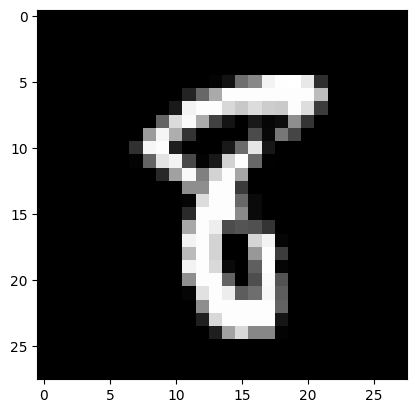

Prediction:  8


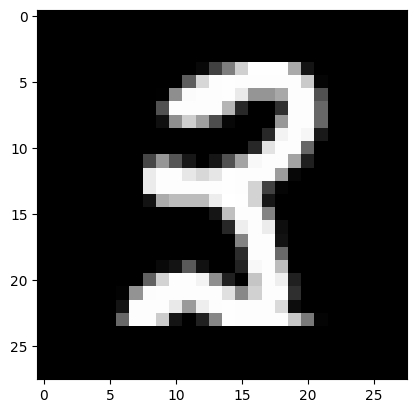

Prediction:  3


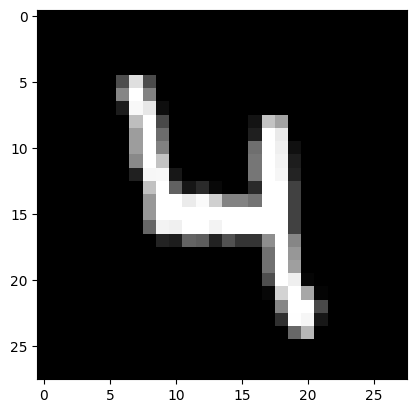

Prediction:  4


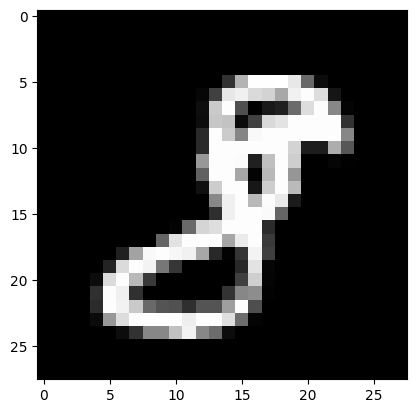

Prediction:  3


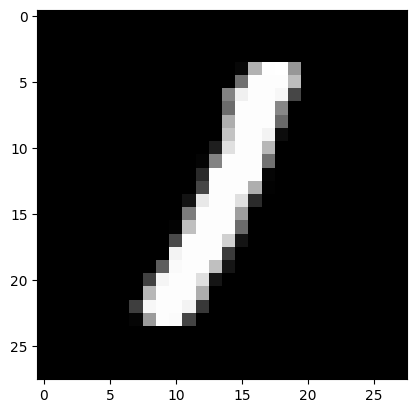

Prediction:  1


In [9]:
number_of_images = 5

# Get the first 'number_of_images' images and labels from the training set
images, labels = next(iter(train_loader))
images, labels = images[:number_of_images], labels[:number_of_images]

# Get the model's predictions
output = model(images)
_, predictions = torch.max(output, 1)

# Plot the images and their predictions
for index in range(number_of_images):
  plt.imshow(images[index].view(28, 28), cmap='gray')
  plt.show()
  print("Prediction: ", predictions[index].item())

Look at incorrect predictions:

In [8]:
#code here
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        test_x, test_y = data
        output = model(test_x)
        _, predicted = torch.max(output.data, 1)
        total += test_y.size(0)
        correct += (predicted == test_y).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 91 %
